In [1]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker_symbol = "^GSPC"  # S&P 500's ticker symbol on Yahoo Finance

# Fetch the data
data = yf.download(ticker_symbol, period="50d")

# Extract the adjusted closing prices
spx_prices = data['Adj Close'].values

print(spx_prices)

[*********************100%%**********************]  1 of 1 completed
[4376.85986328 4396.43994141 4450.37988281 4455.58984375 4446.81982422
 4411.58984375 4398.95019531 4409.52978516 4439.25976562 4472.16015625
 4510.04003906 4505.41992188 4522.79003906 4554.97998047 4565.72021484
 4534.87011719 4536.33984375 4554.64013672 4567.45996094 4566.75
 4537.41015625 4582.22998047 4588.95996094 4576.72998047 4513.39013672
 4501.89013672 4478.02978516 4518.43994141 4499.37988281 4467.70996094
 4468.83007812 4464.04980469 4489.72021484 4437.85986328 4404.33007812
 4370.35986328 4369.70996094 4399.77001953 4387.54980469 4436.00976562
 4376.31005859 4405.70996094 4433.31005859 4497.62988281 4514.87011719
 4507.66015625 4515.77001953 4496.83007812 4465.47998047 4451.14013672]


In [5]:
from MC.stochastic_process_simulation import *
import statsmodels.api as sm

dt = 1/252
tau = 50/365

# Calculate log returns
prices = spx_prices
log_returns = np.log(prices[1:] / prices[:-1])

# Estimate theta
theta = np.mean(spx_prices)

# Regression to estimate k
lagged_returns = log_returns[:-1]
current_returns = log_returns[1:]

model = sm.OLS(current_returns, sm.add_constant(lagged_returns)).fit()
beta = model.params[1]
k = -np.log(beta)

# Daily volatility
daily_volatility = np.std(log_returns)

# Annualize the volatility
sigma = daily_volatility * np.sqrt(252)


model = VasicekProcess(theta = theta, tau = tau)

model.fit(spx_prices, dt)

ValueError: MLE optimization did not converge.

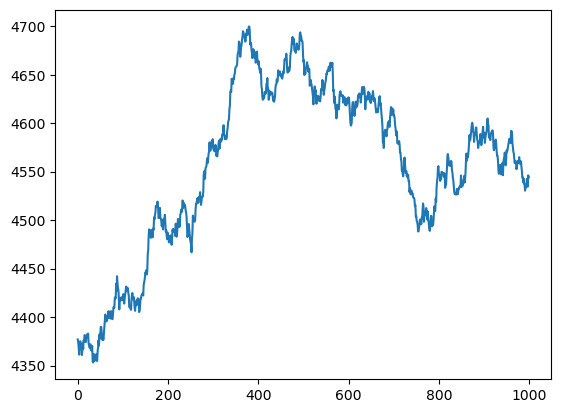

In [ ]:
model.simulate()


from matplotlib import pyplot as plt
plt.plot(model.get_simulation())

In [ ]:
model.simulate()
model.get_simulation()

array([4376.85986328, 4371.15092254, 4371.68132275, 4369.22717287,
       4361.97120035, 4371.96119379, 4364.93840791, 4351.06860842,
       4351.47941087, 4347.95316993, 4349.45402273, 4357.79294983,
       4354.36604277, 4351.5240762 , 4342.44262031, 4339.49505465,
       4339.29995451, 4333.53067622, 4332.70717046, 4319.79956835,
       4315.61662715, 4309.9388569 , 4314.14229189, 4316.8884102 ,
       4311.06258821, 4302.41120351, 4295.77769549, 4285.91042225,
       4290.61614446, 4295.77097235, 4298.01503004, 4298.87447776,
       4290.29311855, 4291.4805766 , 4285.15626039, 4283.73774446,
       4279.47425968, 4274.84891669, 4283.45796138, 4285.16489629,
       4282.03907778, 4282.06957176, 4280.20995746, 4269.85538383,
       4271.92415282, 4270.45952586, 4271.27022293, 4277.94252221,
       4273.94544282, 4255.87283111, 4257.75902576, 4251.30293032,
       4251.49828966, 4254.3524832 , 4254.30441041, 4259.09043903,
       4255.45496583, 4258.85214794, 4261.32101101, 4257.90011

In [ ]:
model.sigma

0.1043472852065496

In [ ]:
k
sigma

0.1043472852065496